In [29]:
HTML_MODE = True
if not HTML_MODE:
    %matplotlib widget
else:
    %matplotlib inline

### 週販レポート
# 標準ライブラリ
import os
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he
from gamedata import chart_hard as ch
from gamedata import util as gu

# レポート日付
from report_config import get_config

config = get_config()
report_date = config["date"]
report_event_mask = he.EventMasks(hard=1.5, price=3, sale=2, soft=1.5, event=1)

def show_title(d:datetime) -> None:
    last_updated_str = d.strftime("%Y-%m-%d")
    mode = "[[LAB MODE]]" if not HTML_MODE else ""
    display(Markdown(f"# 国内ゲームハード週販レポート ({last_updated_str}) {mode}"))

show_title(report_date)

if not HTML_MODE:
    plt.show()
    
    

# 国内ゲームハード週販レポート (2025-12-07) 

* ハードウェアの販売データはファミ通の調査結果を基にしています。
* 一部のデータは処理上の都合により、週次値に調整しています。
* [過去の週販レポート](index.html)

## 直近4週間のハード売り上げ／累計推移

Switch2の販売台数は先週の9万7千台から大幅増の20万3398台。
メトロイドプライム4ビヨンド効果です(断言)。

203,398台はZA発売週の記録を超えて、Switch2史上2番目の販売台数です(1番はもちろん発売日です)。
一気に300万台を突破し、累計は317万台となりました。
いやー、メトロイドは凄まじいですね、ポケモンを超えてます。

Switchも3.5万台から5万台に伸びてます。さすが年末シーズンです。

PS5は先週の3万5千台から1万台減少の2万5千台です。
ですが2020年のPS年間最低記録797797台を25002台上回り、年間最低記録の更新を回避しました。

今週の集計にはセール期間が1日(12/1)含まれますが、さすがに1日ではセール効果には足りなかったようです。
Proは15736台→8797台と半減。DE日本語版は17491台→12372台と5千台の減少。
今後、セールがない期間は2万弱に落ち着きそうです。

In [30]:
df1 = hs.load_hard_sales()
(out1, style1) = ch.chart_units_by_date_hw(df1, begin=gu.weeks_before(report_date, 3), end=report_date)
display(style1)

## 週販推移

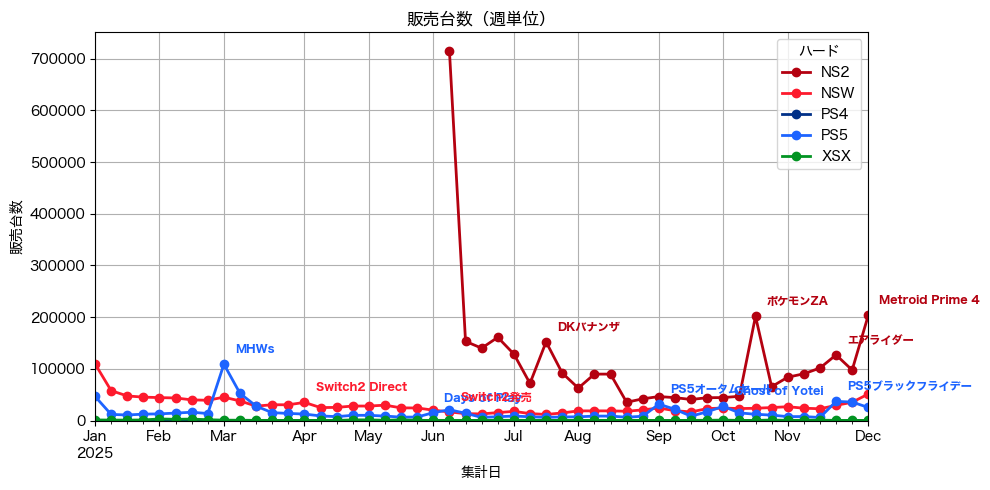

In [61]:
(fig, df) = ph.plot_sales(begin=gu.report_begin(report_date), end=report_date, event_mask=report_event_mask)

### 週販推移(拡大）

メトロイドプライム4ビヨンド向けのSwitch2集中出荷なのか、
それとも12月は毎週20万台投入するのか。今後も注目です。

PS5とSwitchは明暗が逆転しました。
セール期間の終わったPS5は落ち着き、年末商戦のSwitchはまだ伸びていくと思われます。


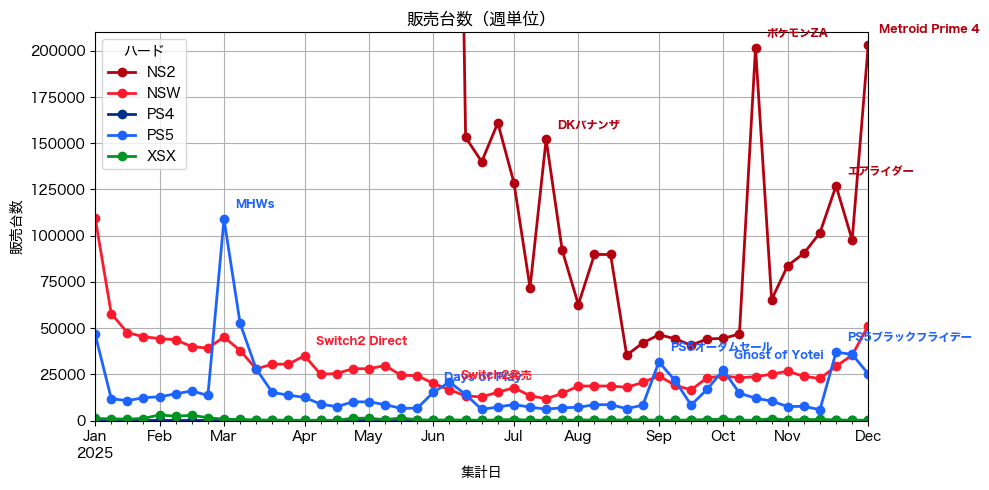

In [62]:
(fig, df) = ph.plot_sales(begin=gu.report_begin(report_date), end=report_date, ymax=210000, event_mask=report_event_mask)

## 月間販売推移

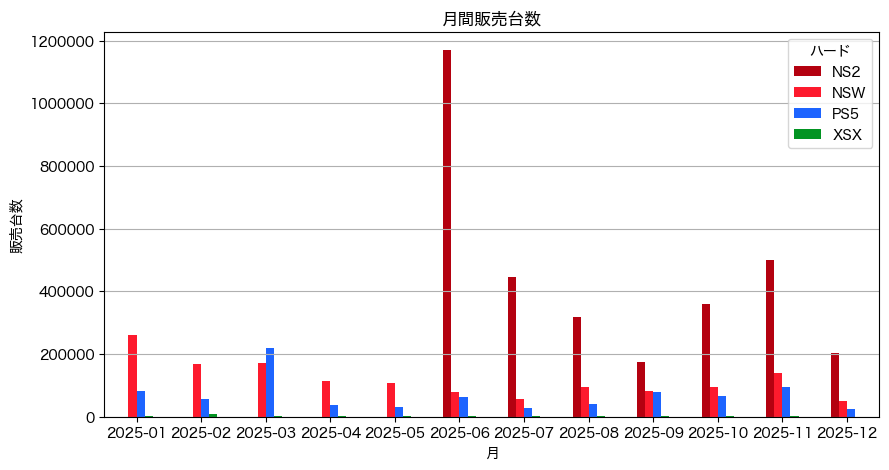

In [39]:
(fig, df) = ph.plot_monthly_bar_by_hard(hw=["NS2", "PS5", "NSW", "XSX"], 
                                        begin=gu.report_begin(report_date), end=report_date,
                                        stacked=False)

今週のようなペースでSwitch2の出荷が続くなら12月は100万台到達しますが、
はたしてどこまで伸びるでしょうか。

In [40]:
df = df.style.format({'NS2': '{:,.0f}', 'NSW': '{:,.0f}', 'PS5': '{:,.0f}', 'XSX': '{:,.0f}'})
display(df)

hw,NS2,NSW,PS5,XSX
year_month,,,,
2025-01,0,"260,447","81,587","3,861"
2025-02,0,"167,188","56,886","9,751"
2025-03,0,"171,921","218,300","2,081"
2025-04,0,"113,513","38,983","1,710"
2025-05,0,"106,506","32,001","3,467"
2025-06,"1,169,684","78,097","63,516","1,400"
2025-07,"444,706","57,532","28,959","1,197"
2025-08,"319,690","94,517","39,004","1,599"
2025-09,"175,542","82,946","78,693","1,121"


### Nintendo Switchの月間販売台数： 2023,2024年との比較

Switchの2025年11月の前年度比は54%でしたが、
12月も意外と前年比50％程度には到達するかも知れません。


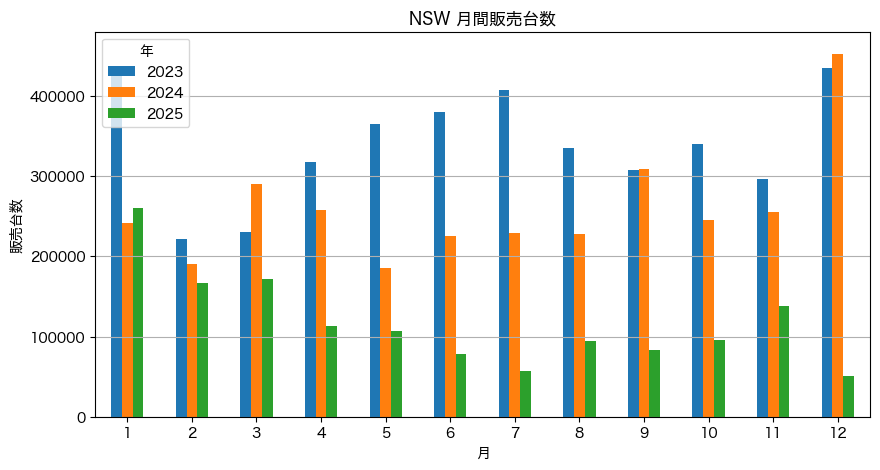

In [42]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="NSW", ymax=480000, begin=gu.years_ago(report_date), end=report_date)

### PlayStation 5の月間販売台数： 2023, 2024年との比較

ブラックフライデーセールが終わったばかりですが、12月にそれなりの台数を販売するには
クリスマスセールが必要です。それともセール無いまま年を越すのでしょうか。


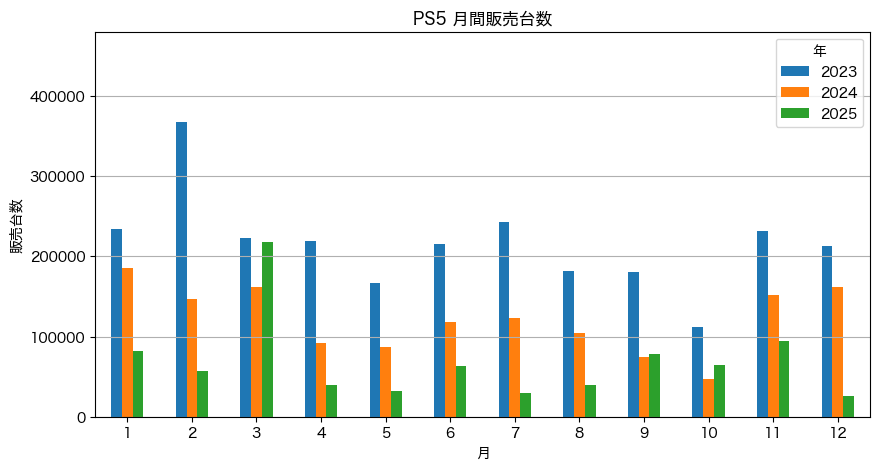

In [43]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="PS5", ymax=480000, begin=gu.years_ago(report_date), end=report_date)

## 累計販売推移



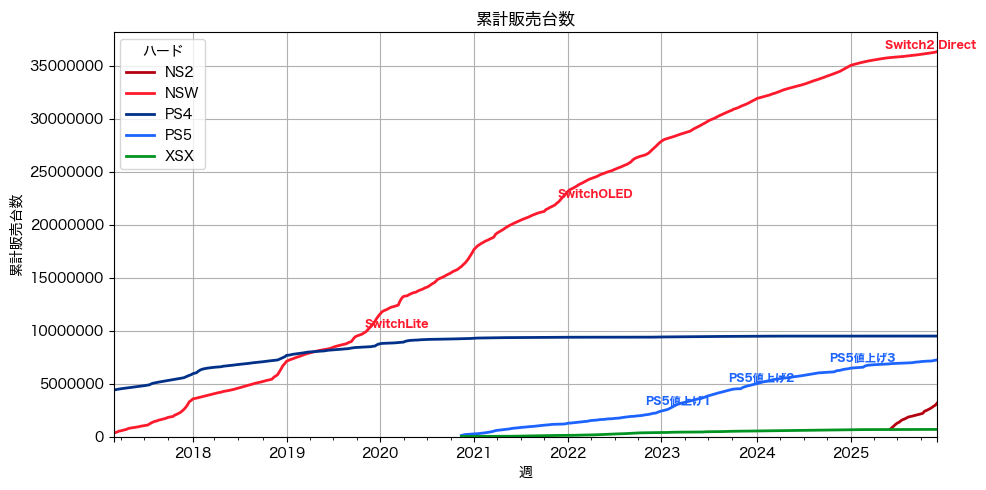

In [63]:
long_range_event_mask = he.EventMasks(hard=0.5, soft=0, event=0, price=0, sale=0)
(fig, df) = ph.plot_cumulative_sales(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], begin=datetime(2017,3,1), event_mask = long_range_event_mask)


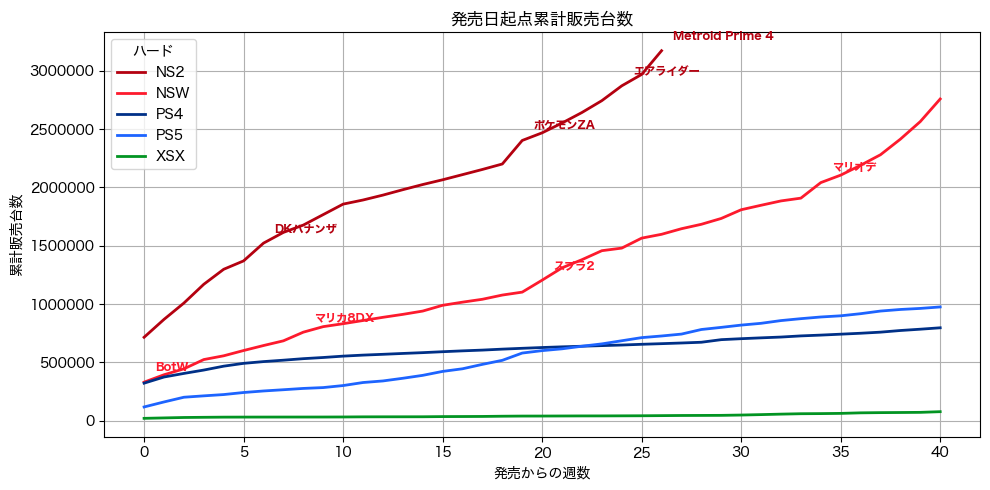

In [64]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], end=40, event_mask=report_event_mask)

In [22]:
# df

## Switch2初動状況

驚くべきことに、Switch2はGBAを1300台上回って歴代初動一位に返り咲きです。
「年内のGBAキャッチアップは難しそうです。」なんて書いて申し訳ありませんでした。
年内どころか12月初週でキャッチアップしました。任天堂の本気恐るべしです。


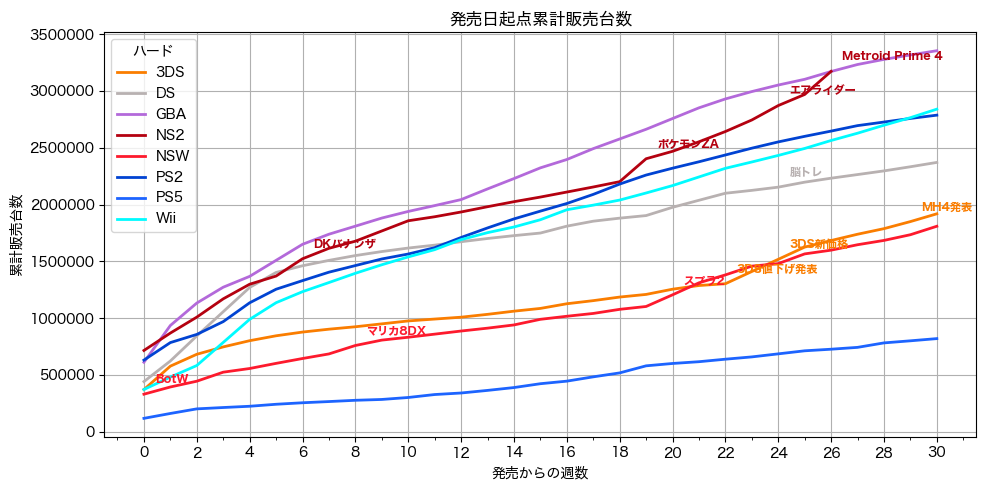

In [66]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=["GBA", "NS2", "DS", "PS2", "Wii", "3DS", "NSW", "PS5"], 
                                        mode="week", xgrid=2, end=30,
                                        event_mask=report_event_mask)

In [67]:
df12 = df.iloc[df.index == 26]
# df12をunpivotして、列名を"ハード"、"販売数"にする
df12_unpivot = df12.unstack().reset_index()
df12_unpivot.columns = ['ハード', '週数', '販売数']
df12_unpivot.sort_values(by='販売数', ascending=False, inplace=True)
df12_unpivot.set_index('ハード', inplace=True)
display(df12_unpivot.style.format({'販売数': '{:,.0f}'}))

,週数,販売数
ハード,,
NS2,26,"3,171,833"
GBA,26,"3,170,501"
PS2,26,"2,646,022"
Wii,26,"2,563,371"
DS,26,"2,231,592"
3DS,26,"1,683,014"
NSW,26,"1,598,130"
PS5,26,"726,462"


## 年単位の状況

2025年の販売台数が544万台に到達しました。
Switch2の出荷ペースがこのまま続くなら、
2018年、2019年の記録を超えて、年間600万台に到達する可能性があります。


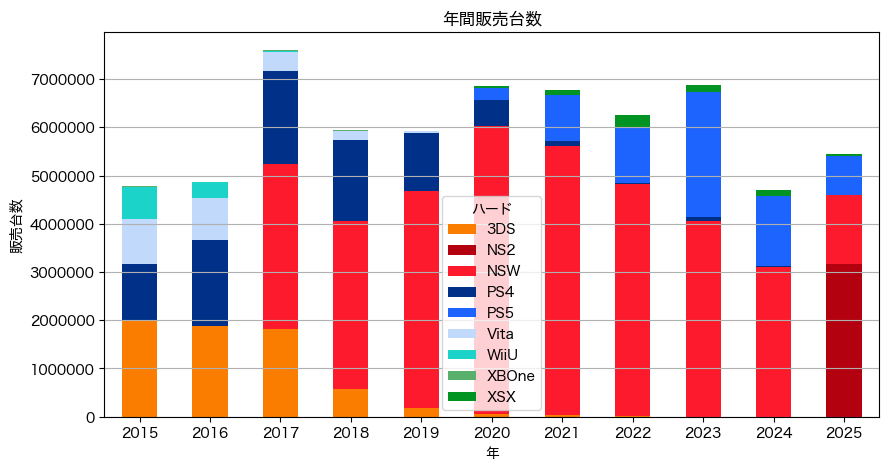

In [56]:
(fig, df) = ph.plot_yearly_bar_by_hard(hw=['PS4', 'PS5', 'NSW', 'NS2', '3DS', 'WiiU', 'Vita', 'XSX', 'XBOne'], 
                                       begin=gu.years_ago(report_date, 10),
                                       end=report_date, stacked=True)

In [58]:
# df["sum"] = df.sum(axis=1)
# df

### 年単位のメーカーシェア

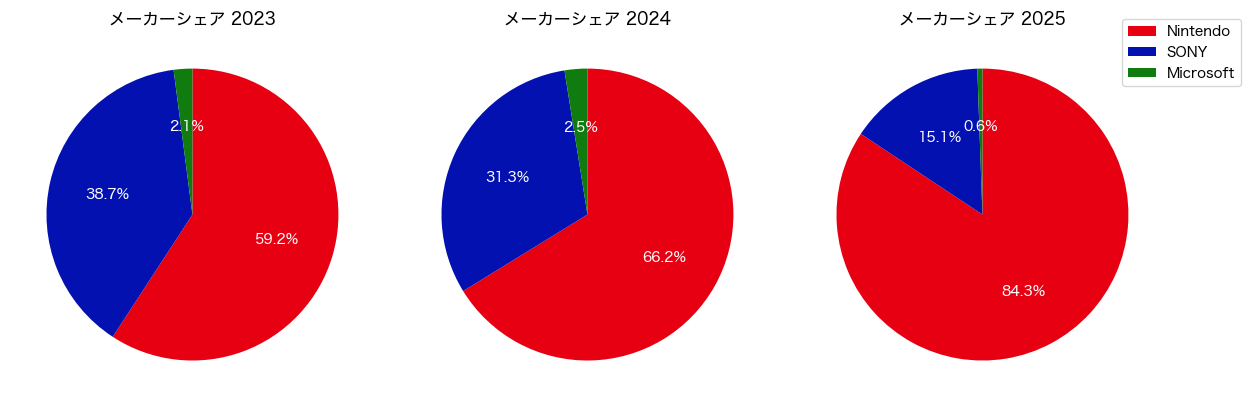

In [60]:
(fig, df) = ph.plot_maker_share_pie(begin_year=gu.years_ago(report_date, 2).year, end_year=report_date.year)